In [6]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns  
from sklearn.metrics import mean_squared_error
import math

In [7]:
os.getcwd()

'D:\\13284\\Projects\\DATA Science\\Capstone\\Project_2'

In [9]:
df = pd.read_csv('health care diabetes.csv')

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# Perform descriptive analysis. Understand the variables and their corresponding values. On the columns below, a value of zero does not make sense and thus indicates missing value:

Glucose

• BloodPressure

• SkinThickness

• Insulin

• BMI

In [7]:
mean = df.mean()

In [8]:
df['Pregnancies'] = df.Pregnancies.replace(0,int(mean.Pregnancies))            
df['Glucose'] = df.Glucose.replace(0,int(mean.Glucose))  
df['BloodPressure'] = df.BloodPressure.replace(0,int(mean.BloodPressure))   
df['SkinThickness'] = df.SkinThickness.replace(0,int(mean.SkinThickness))   
df['Insulin'] = df.Insulin.replace(0,int(mean.Insulin))   
df['BMI'] = df.BMI.replace(0,(mean.BMI))   
df['DiabetesPedigreeFunction'] = df.DiabetesPedigreeFunction.replace(0,(mean.DiabetesPedigreeFunction))
df['Age'] = df.Age.replace(0,int(mean.Age))

In [9]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,79,33.6,0.627,50,1
1,1,85,66,29,79,26.6,0.351,31,0
2,8,183,64,20,79,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,3,137,40,35,168,43.1,2.288,33,1


In [10]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,4.278646,3.021516,1.000,2.00000,3.0000,6.00000,17.00
Glucose,768.0,121.675781,30.436252,44.000,99.75000,117.0000,140.25000,199.00
BloodPressure,768.0,72.250000,12.117203,24.000,64.00000,72.0000,80.00000,122.00
SkinThickness,768.0,26.447917,9.733872,7.000,20.00000,23.0000,32.00000,99.00
Insulin,768.0,118.270833,93.243829,14.000,79.00000,79.0000,127.25000,846.00
BMI,768.0,32.450805,6.875374,18.200,27.50000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


# Week-1: 2) Visually explore these variables using histograms. Treat the missing values accordingly.

(array([  4.,  19.,  87., 149., 166., 125.,  88.,  54.,  44.,  32.]),
 array([ 44. ,  59.5,  75. ,  90.5, 106. , 121.5, 137. , 152.5, 168. ,
        183.5, 199. ]),
 <BarContainer object of 10 artists>)

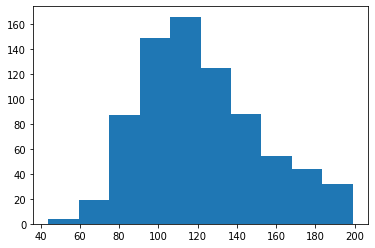

In [11]:
plt.hist(df['Glucose'])

(array([  3.,   2.,  35., 118., 261., 214., 105.,  18.,  10.,   2.]),
 array([ 24. ,  33.8,  43.6,  53.4,  63.2,  73. ,  82.8,  92.6, 102.4,
        112.2, 122. ]),
 <BarContainer object of 10 artists>)

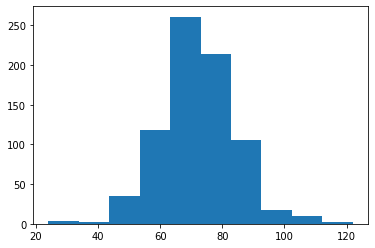

In [85]:
plt.hist(df['BloodPressure'])

(array([ 59., 368., 181., 118.,  36.,   4.,   1.,   0.,   0.,   1.]),
 array([ 7. , 16.2, 25.4, 34.6, 43.8, 53. , 62.2, 71.4, 80.6, 89.8, 99. ]),
 <BarContainer object of 10 artists>)

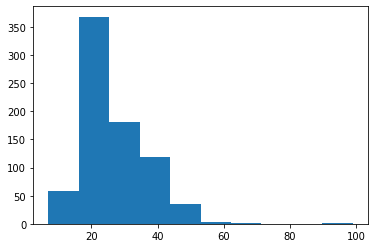

In [98]:
plt.hist(df['SkinThickness'])

(array([516., 143.,  55.,  29.,   7.,  10.,   4.,   1.,   2.,   1.]),
 array([ 14. ,  97.2, 180.4, 263.6, 346.8, 430. , 513.2, 596.4, 679.6,
        762.8, 846. ]),
 <BarContainer object of 10 artists>)

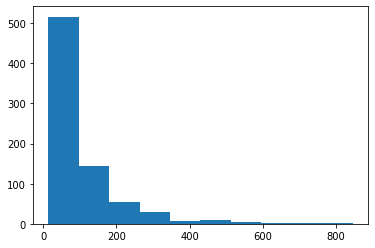

In [147]:
plt.hist(df['Insulin'])

(array([ 52., 161., 207., 193.,  91.,  48.,  10.,   4.,   1.,   1.]),
 array([18.2 , 23.09, 27.98, 32.87, 37.76, 42.65, 47.54, 52.43, 57.32,
        62.21, 67.1 ]),
 <BarContainer object of 10 artists>)

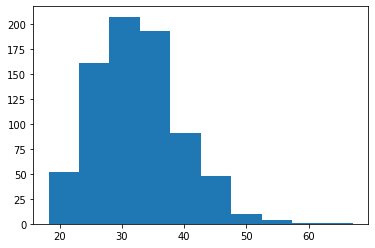

In [100]:
plt.hist(df['BMI'])

# Week-1 : 3. There are integer and float data type variables in this dataset. Create a count (frequency) plot describing the data types and the count of variables. 

In [105]:
df['Glucose'].value_counts().head(10)

100    17
99     17
120    16
129    14
111    14
106    14
125    14
102    13
108    13
112    13
Name: Glucose, dtype: int64

In [106]:
df['Glucose'].value_counts().describe()

count    135.000000
mean       5.688889
std        3.993403
min        1.000000
25%        3.000000
50%        5.000000
75%        8.000000
max       17.000000
Name: Glucose, dtype: float64

<AxesSubplot:>

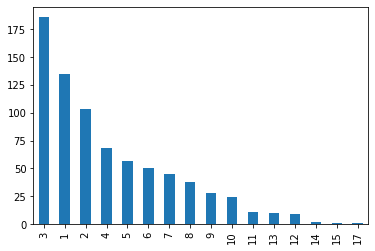

In [109]:
df['Pregnancies'].value_counts().plot.bar()

In [110]:
df['BloodPressure'].value_counts().head(10)

70    57
74    52
78    45
68    45
72    44
64    43
80    40
76    39
60    37
69    35
Name: BloodPressure, dtype: int64

In [111]:
df['BloodPressure'].value_counts().describe()

count    47.000000
mean     16.340426
std      17.038673
min       1.000000
25%       2.000000
50%       8.000000
75%      30.000000
max      57.000000
Name: BloodPressure, dtype: float64

In [122]:
df['SkinThickness'].value_counts().head(10)

20    240
32     31
30     27
27     23
23     22
33     20
28     20
18     20
31     19
19     18
Name: SkinThickness, dtype: int64

In [123]:
df['SkinThickness'].value_counts().describe()

count     50.000000
mean      15.360000
std       33.299972
min        1.000000
25%        4.250000
50%       10.500000
75%       16.000000
max      240.000000
Name: SkinThickness, dtype: float64

In [124]:
df['Insulin'].value_counts().head(10)

79     376
105     11
130      9
140      9
120      8
180      7
94       7
100      7
135      6
115      6
Name: Insulin, dtype: int64

In [125]:
df['Insulin'].value_counts().describe()

count    185.000000
mean       4.151351
std       27.541053
min        1.000000
25%        1.000000
50%        1.000000
75%        3.000000
max      376.000000
Name: Insulin, dtype: float64

In [126]:
df['BMI'].value_counts().head(10)

32.000000    13
31.200000    12
31.600000    12
31.992578    11
33.300000    10
32.400000    10
32.800000     9
30.800000     9
32.900000     9
30.100000     9
Name: BMI, dtype: int64

In [127]:
df['BMI'].value_counts().describe()

count    248.000000
mean       3.096774
std        2.359988
min        1.000000
25%        1.000000
50%        2.000000
75%        4.000000
max       13.000000
Name: BMI, dtype: float64

In [128]:
df['Age'].value_counts().head(10)

22    72
21    63
25    48
24    46
23    38
28    35
26    33
27    32
29    29
31    24
Name: Age, dtype: int64

In [129]:
df['Age'].value_counts().describe()

count    52.000000
mean     14.769231
std      15.893784
min       1.000000
25%       4.000000
50%       8.000000
75%      18.250000
max      72.000000
Name: Age, dtype: float64

# Week-2: 1. Check the balance of the data by plotting the count of outcomes by their value. Describe your findings and plan future course of action.

In [32]:
Outcome_1 = df[df['Outcome']==1]
Outcome_1.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.0
mean,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164,1.0
std,3.741239,31.939622,21.491812,17.679711,138.689125,7.262967,0.372354,10.968254,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.088000,21.000000,1.0
25%,1.750000,119.000000,66.000000,0.000000,0.000000,30.800000,0.262500,28.000000,1.0
50%,4.000000,140.000000,74.000000,27.000000,0.000000,34.250000,0.449000,36.000000,1.0
75%,8.000000,167.000000,82.000000,36.000000,167.250000,38.775000,0.728000,44.000000,1.0
max,17.000000,199.000000,114.000000,99.000000,846.000000,67.100000,2.420000,70.000000,1.0


In [33]:
Outcome_0 = df[df['Outcome']==0]
Outcome_0.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,500.000000,500.0000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.0
mean,3.298000,109.9800,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000,0.0
std,3.017185,26.1412,18.063075,14.889947,98.865289,7.689855,0.299085,11.667655,0.0
min,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.0
25%,1.000000,93.0000,62.000000,0.000000,0.000000,25.400000,0.229750,23.000000,0.0
50%,2.000000,107.0000,70.000000,21.000000,39.000000,30.050000,0.336000,27.000000,0.0
75%,5.000000,125.0000,78.000000,31.000000,105.000000,35.300000,0.561750,37.000000,0.0
max,13.000000,197.0000,122.000000,60.000000,744.000000,57.300000,2.329000,81.000000,0.0


OUTCOME = 0 have 500 records (65% of data has outcome = 0)

OUTCOME = 1 have 268 records (35% of data has outcome = 1)

(array([86.,  0., 29.,  0.,  0., 20.,  0.,  0.,  7.,  0.,  0.,  3.,  0.,
         0.,  1.,  0.,  0.,  1.,  0.,  1.]),
 array([1.  , 1.35, 1.7 , 2.05, 2.4 , 2.75, 3.1 , 3.45, 3.8 , 4.15, 4.5 ,
        4.85, 5.2 , 5.55, 5.9 , 6.25, 6.6 , 6.95, 7.3 , 7.65, 8.  ]),
 <BarContainer object of 20 artists>)

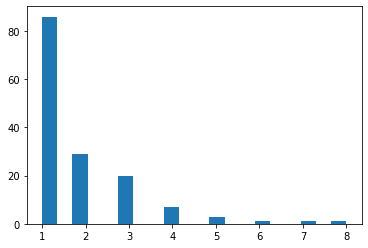

In [51]:
plt.hist(Outcome_1['BMI'].value_counts(), bins = 20)

(array([87.,  0., 42.,  0.,  0., 38.,  0., 23.,  0.,  0.,  6.,  0.,  8.,
         0.,  0.,  4.,  0.,  1.,  0.,  1.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. , 5.4, 5.8,
        6.2, 6.6, 7. , 7.4, 7.8, 8.2, 8.6, 9. ]),
 <BarContainer object of 20 artists>)

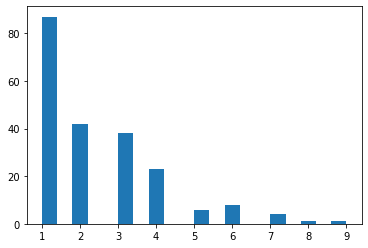

In [52]:
plt.hist(Outcome_0['BMI'].value_counts(), bins = 20)

(array([28.,  0.,  0., 28.,  0.,  0., 25.,  0.,  0.,  0., 12.,  0.,  0.,
         6.,  0.,  0.,  4.,  0.,  0.,  1.]),
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. , 4.3, 4.6,
        4.9, 5.2, 5.5, 5.8, 6.1, 6.4, 6.7, 7. ]),
 <BarContainer object of 20 artists>)

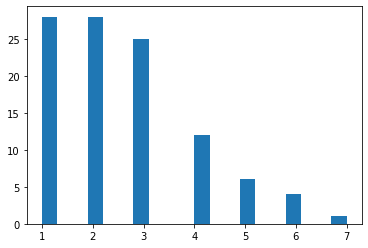

In [55]:
plt.hist(Outcome_1['Glucose'].value_counts(), bins = 20)

(array([28.,  0.,  0., 28.,  0.,  0., 25.,  0.,  0.,  0., 12.,  0.,  0.,
         6.,  0.,  0.,  4.,  0.,  0.,  1.]),
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. , 4.3, 4.6,
        4.9, 5.2, 5.5, 5.8, 6.1, 6.4, 6.7, 7. ]),
 <BarContainer object of 20 artists>)

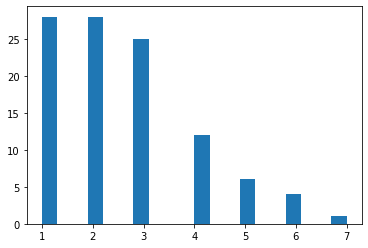

In [58]:
plt.hist(Outcome_1['Glucose'].value_counts(), bins = 20)

(array([25., 14., 17., 10.,  0.,  4., 10.,  8.,  8.,  0.,  8.,  3.,  1.,
         0.,  0.,  2.,  0.,  0.,  0.,  1.]),
 array([ 1. ,  1.8,  2.6,  3.4,  4.2,  5. ,  5.8,  6.6,  7.4,  8.2,  9. ,
         9.8, 10.6, 11.4, 12.2, 13. , 13.8, 14.6, 15.4, 16.2, 17. ]),
 <BarContainer object of 20 artists>)

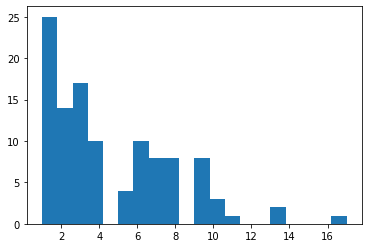

In [59]:
plt.hist(Outcome_0['Glucose'].value_counts(), bins = 20)

(array([17.,  4.,  0.,  1.,  0.,  1.,  0.,  1.,  1.,  3.,  5.,  0.,  0.,
         2.,  2.,  1.,  0.,  0.,  0.,  1.]),
 array([ 1. ,  2.1,  3.2,  4.3,  5.4,  6.5,  7.6,  8.7,  9.8, 10.9, 12. ,
        13.1, 14.2, 15.3, 16.4, 17.5, 18.6, 19.7, 20.8, 21.9, 23. ]),
 <BarContainer object of 20 artists>)

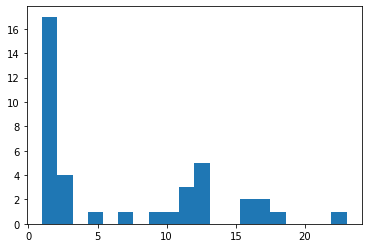

In [60]:
plt.hist(Outcome_1['BloodPressure'].value_counts(), bins = 20)

(array([13.,  5.,  2.,  1.,  3.,  3.,  1.,  1.,  0.,  1.,  3.,  1.,  0.,
         1.,  0.,  3.,  0.,  2.,  1.,  2.]),
 array([ 1. ,  2.7,  4.4,  6.1,  7.8,  9.5, 11.2, 12.9, 14.6, 16.3, 18. ,
        19.7, 21.4, 23.1, 24.8, 26.5, 28.2, 29.9, 31.6, 33.3, 35. ]),
 <BarContainer object of 20 artists>)

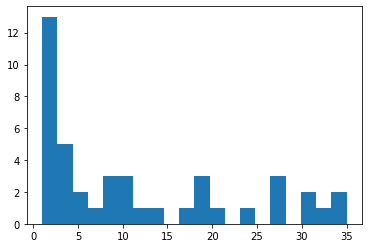

In [61]:
plt.hist(Outcome_0['BloodPressure'].value_counts(), bins = 20)

# Week-2: 2. Create scatter charts between the pair of variables to understand the relationships. Describe your findings.

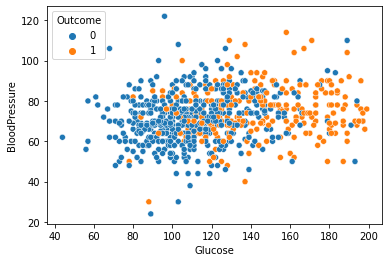

In [162]:
g =sns.scatterplot(x= "Glucose" ,y= "BloodPressure", hue="Outcome", data=df);

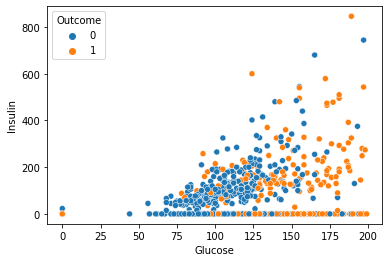

In [4]:
gI =sns.scatterplot(x= "Glucose" ,y= "Insulin", hue="Outcome", data=df);

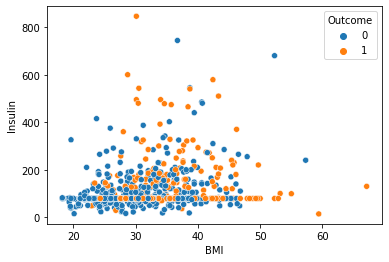

In [163]:
B =sns.scatterplot(x= "BMI" ,y= "Insulin",
              hue="Outcome",
              data=df);

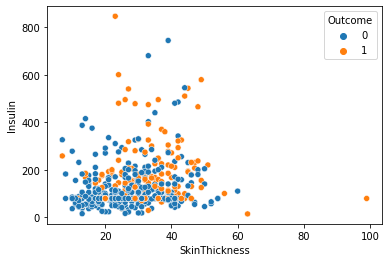

In [164]:
S =sns.scatterplot(x= "SkinThickness" ,y= "Insulin",  hue="Outcome", data=df);

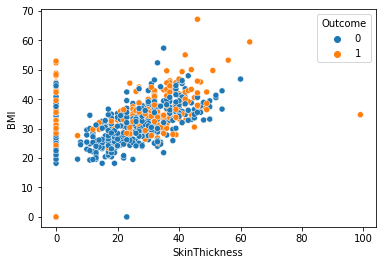

In [5]:
SB =sns.scatterplot(x= "SkinThickness" ,y= "BMI",  hue="Outcome", data=df);

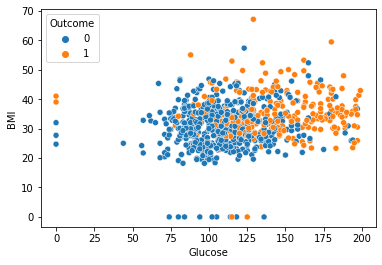

In [10]:
SB1 =sns.scatterplot(x= "Glucose" ,y= "BMI",  hue="Outcome", data=df);

Observations based on scatter plots

Graph- 1: Based  on graph there is no relation between Glucose and BloodPreasure because of data scattered all over the area  and observed some outliers in data.

Graph-2: There is relation between Glucose and insulin, if glucose increases insulin number also increased for Outcome = 0 people

Graph-3 : Even if BMI increaes there is no much increase in Insulin  and observed more outliers in the data for Outcome = 1

Graph-4: No releation between Skinthickness and insulin, data scatterd all in some specific area range

Graph- 5: BMI increased and SkinThickness also increased and no much outliers in data 

# Week-2: 3. Perform correlation analysis. Visually explore it using a heat map.

In [8]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<AxesSubplot:>

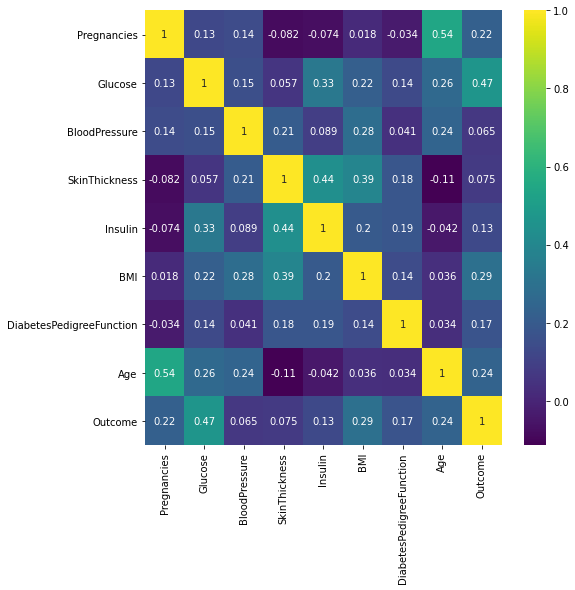

In [16]:
plt.subplots(figsize=(8,8))
sns.heatmap(df.corr(),annot=True, cmap='viridis')  ### gives correlation value

Correlation ranges from -1 to +1. 
Values closer to zero means there is no linear trend between the two variables. 
The values close to 1 the correlation is the more positively and has stronger this relationship 

In the above graph AGE and Pregencies are more stong relation compared to other values (Value has 0.54 which is height value in correlation matrix)

# Week-3: 1. Devise strategies for model building. It is important to decide the right validation framework. Express your thought process.

# 2. Apply an appropriate classification algorithm to build a model. Compare various models with the results from KNN algorithm.

In [46]:
# Logistic Regreation and model building
features = df.iloc[:,[0,1,2,3,4,5,6,7]].values
label = df.iloc[:,8].values
features

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [47]:
#Train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(features,label, test_size=0.2,random_state =1)

In [48]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(614, 8) (154, 8) (614,) (154,)


In [49]:
#Create model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
reg = model.fit(X_train,y_train) 
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

0.7833876221498371
0.7792207792207793


D:\Python\Lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Regression model score for test data and trainn data has nearer values and close to 1, Hence i can say this model is good

In [50]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(label,model.predict(features))
cm

array([[447,  53],
       [114, 154]], dtype=int64)

In [51]:
from sklearn.metrics import classification_report
print(classification_report(label,model.predict(features)))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       500
           1       0.74      0.57      0.65       268

    accuracy                           0.78       768
   macro avg       0.77      0.73      0.75       768
weighted avg       0.78      0.78      0.77       768



AUC: 0.840


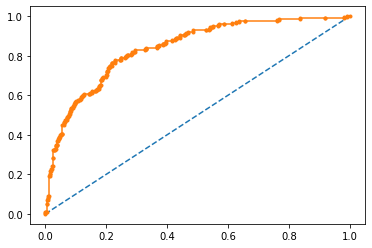

In [52]:
#Preparing ROC Curve (Receiver Operating Characteristics Curve)
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# predict probabilities
probs = model.predict_proba(features)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(label, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(label, probs)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')


In [53]:
#Applying Decission Tree Classifier
from sklearn.tree import DecisionTreeClassifier
model3 = DecisionTreeClassifier(max_depth=5)
model3.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [54]:
model3.score(X_train,y_train)

0.8403908794788274

In [55]:
model3.score(X_test,y_test)

0.7272727272727273

In [56]:
#Applying Random Forest
from sklearn.ensemble import RandomForestClassifier
model4 = RandomForestClassifier(n_estimators=11)
model4.fit(X_train,y_train)

RandomForestClassifier(n_estimators=11)

In [57]:
model4.score(X_train,y_train)

0.9820846905537459

In [58]:
model4.score(X_test, y_test)

0.7792207792207793

In [59]:
#Support Vector Classifier

from sklearn.svm import SVC 
model5 = SVC(kernel='rbf',
           gamma='auto')
model5.fit(X_train,y_train)

SVC(gamma='auto')

In [60]:
model5.score(X_test,y_test)

0.6428571428571429

In [61]:
#Applying K-NN
from sklearn.neighbors import KNeighborsClassifier
model2 = KNeighborsClassifier(n_neighbors=7,
                             metric='minkowski',
                             p = 2)
model2.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [62]:
model2.score(X_test,y_test)

0.7597402597402597

In [63]:
model2.score(X_train, y_train)

0.7899022801302932

KNN has score values 0.78 for train data and 0.75 test data and those scores are similar to Logistric regression 

# Week 4 : Data Modeling (1. Create a classification report by analyzing sensitivity, specificity, AUC (ROC curve), etc. Please be descriptive to explain what values of these parameter you have used.)

AUC: 0.846
True Positive Rate - [0.         0.06716418 0.23880597 0.41791045 0.62686567 0.79477612
 0.9141791  0.98134328 1.        ], False Positive Rate - [0.    0.    0.014 0.054 0.132 0.256 0.424 0.702 1.   ] Thresholds - [2.         1.         0.85714286 0.71428571 0.57142857 0.42857143
 0.28571429 0.14285714 0.        ]


Text(0, 0.5, 'True Positive Rate')

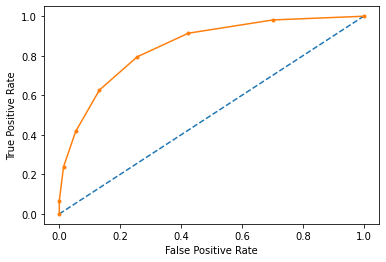

In [64]:
#Preparing ROC Curve (Receiver Operating Characteristics Curve)
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# predict probabilities
probs = model2.predict_proba(features)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(label, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(label, probs)
print("True Positive Rate - {}, False Positive Rate - {} Thresholds - {}".format(tpr,fpr,thresholds))
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

f1=0.648 auc=0.727 ap=0.729


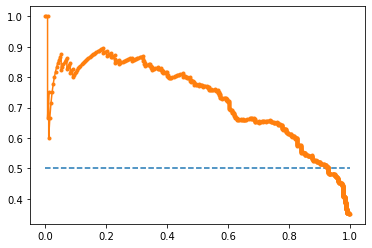

In [65]:
#Precision Recall Curve for Logistic Regression

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
# predict probabilities
probs = model.predict_proba(features)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# predict class values
yhat = model.predict(features)
# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(label, probs)
# calculate F1 score
f1 = f1_score(label, yhat)
# calculate precision-recall AUC
auc = auc(recall, precision)
# calculate average precision score
ap = average_precision_score(label, probs)
print('f1=%.3f auc=%.3f ap=%.3f' % (f1, auc, ap))
# plot no skill
plt.plot([0, 1], [0.5, 0.5], linestyle='--')
# plot the precision-recall curve for the model
plt.plot(recall, precision, marker='.')

f1=0.669 auc=0.764 ap=0.720


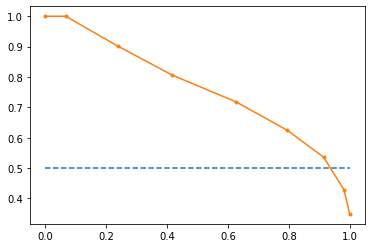

In [66]:
#Precision Recall Curve for KNN

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
# predict probabilities
probs = model2.predict_proba(features)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# predict class values
yhat = model2.predict(features)
# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(label, probs)
# calculate F1 score
f1 = f1_score(label, yhat)
# calculate precision-recall AUC
auc = auc(recall, precision)
# calculate average precision score
ap = average_precision_score(label, probs)
print('f1=%.3f auc=%.3f ap=%.3f' % (f1, auc, ap))
# plot no skill
plt.plot([0, 1], [0.5, 0.5], linestyle='--')
# plot the precision-recall curve for the model
plt.plot(recall, precision, marker='.')

f1=0.721 auc=0.785 ap=0.768


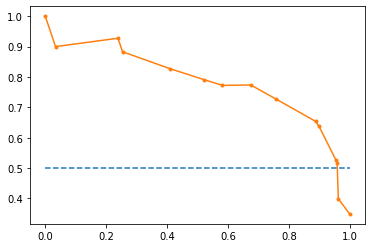

In [67]:
#Precision Recall Curve for Decission Tree Classifier

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
# predict probabilities
probs = model3.predict_proba(features)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# predict class values
yhat = model3.predict(features)
# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(label, probs)
# calculate F1 score
f1 = f1_score(label, yhat)
# calculate precision-recall AUC
auc = auc(recall, precision)
# calculate average precision score
ap = average_precision_score(label, probs)
print('f1=%.3f auc=%.3f ap=%.3f' % (f1, auc, ap))
# plot no skill
plt.plot([0, 1], [0.5, 0.5], linestyle='--')
# plot the precision-recall curve for the model
plt.plot(recall, precision, marker='.')

f1=0.916 auc=0.972 ap=0.964


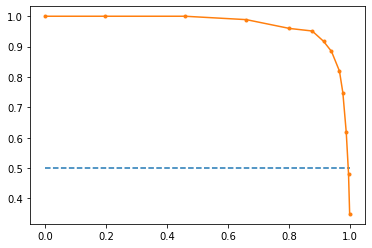

In [68]:
#Precision Recall Curve for Random Forest

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
# predict probabilities
probs = model4.predict_proba(features)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# predict class values
yhat = model4.predict(features)
# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(label, probs)
# calculate F1 score
f1 = f1_score(label, yhat)
# calculate precision-recall AUC
auc = auc(recall, precision)
# calculate average precision score
ap = average_precision_score(label, probs)
print('f1=%.3f auc=%.3f ap=%.3f' % (f1, auc, ap))
# plot no skill
plt.plot([0, 1], [0.5, 0.5], linestyle='--')
# plot the precision-recall curve for the model
plt.plot(recall, precision, marker='.')